In [1]:
import cv2

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# Use matplotlib qt and restart kernel for interactive visualization

In [24]:
import os
images = os.listdir('images/')
images

['1.jfif',
 '1.jpg',
 '1.png',
 '2.jpg',
 '2.png',
 '3.jpg',
 'Dallas_Fort-Worth-International-Airport.jpg',
 'L715mfusion-NG.jpg',
 'Olympic_2BPark.jpeg',
 'watertreatment_wv2_2013257_highres_crop.jpg']

In [25]:
#SCALE IMAGE

#scale_percent = 30 #ercent of original size
#width = int(img.shape[1] * scale_percent / 100)
#height = int(img.shape[0] * scale_percent / 100)
#dim = (width, height)
## resize image
#img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#img_hsv = cv2.resize(img_hsv, dim, interpolation = cv2.INTER_AREA)

# Code

In [26]:
#  Color Intensities 

# Higher Light Values detect greenery with more accuracy but will include water and other noise, lower values will
# decrease noise but also decrease green accuracy
light_val = 10  #Between 0 and 20

# Higher Dark values will detect less surrounding land, but at the cost of patches in green area(Due to sunlight shadows mostly)
dark_val = 20    #Between 0 and 20

In [38]:
assert 0<=light_val<=20, "Light Val Out of Range"
assert 0<=dark_val<=20, "Dark Val Out of Range"


#green color range in form of (H, S, V)
#start = (15+dark_val,15,15)
#end = (90+light_val,255,255)

start = (0,40,0)
end = (80,255,120)

In [39]:
dark = np.full((10, 10, 3), start, dtype=np.uint8) / 255.0
light = np.full((10, 10, 3), end, dtype=np.uint8) / 255.0

In [40]:
from matplotlib.colors import hsv_to_rgb
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(light))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dark))
plt.show()

In [41]:
#Function to cut out the color mask from the image

def mask_image(image):
    plt.imshow(image)
    mask = cv2.inRange(image, start, end)
    result = cv2.bitwise_and(image, image, mask=mask)
    return mask, result

In [42]:
#Function to display the mask output both in grayscale and rgb

def display_image(mask, result):    
    
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.show()

In [52]:
#print image indices
for key, value in enumerate(images):
    print(key,"-------->", value)

0 --------> 1.jfif
1 --------> 1.jpg
2 --------> 1.png
3 --------> 2.jpg
4 --------> 2.png
5 --------> 3.jpg
6 --------> Dallas_Fort-Worth-International-Airport.jpg
7 --------> L715mfusion-NG.jpg
8 --------> Olympic_2BPark.jpeg
9 --------> watertreatment_wv2_2013257_highres_crop.jpg


In [53]:
index = 7   #Choose image
img_path = images[index]
img = cv2.imread(os.path.join('images/',img_path), cv2.COLOR_BGR2HSV)

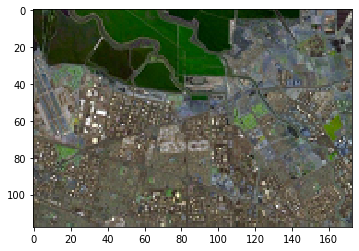

In [54]:
mask, result = mask_image(img)

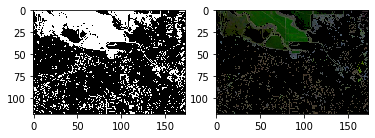

In [55]:
display_image(mask, result)

In [47]:
#SAVE OUTPUT TO DISK
from PIL import Image
output=np.concatenate((img, result))
im = Image.fromarray(output)
im.save("file.jpeg")

# Visualization

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#USE %matplotlib qt and restart notebook for interactive plot

h, s, v = cv2.split(result)
pixel_colors = result.reshape((np.shape(result)[0]*np.shape(result)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


## Naive Area Calculator

In [24]:
orig_pixels = img.flatten()
mask_pixels = result.flatten()

area_total = len(orig_pixels)
area_mask = np.count_nonzero(mask_pixels)

In [25]:
area = (area_mask / area_total) * 100
print(f"The green area is {np.round(area,2)}%")

The green area is 31.92%
